<a href="https://colab.research.google.com/github/hjlee0317/hjlee0317.github.io/blob/main/ProblemSet2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Problem Set 2**

**Coded by**: Hyo-jeong Lee (SID 3039495331)

## **Problem Introduction**

## N-back Task

An n-back task is a simple test in psychology where you are provided a sequence of symbols and must press a button when the current symbol matches one that is n items previous.

For example, given a sequence of letters from the set \{A, B, C\}, someone correctly performing a 2-back would press a botton when the letter matched the one two previously, at these underlined locations:

ACB<u>CB</u>A<u>BA</u>AC<u>AC</u>CCAB

We have provided you with a set of simulated neural data for someone preforming an n-back task. The provided dataset includes the sequence of stimuli they have so far seen, followed by simulated neural activations, which you can think of as firing rates for a population of two neurons.

With this scheme, **how are cognitive states encoded neurally?**

## **Question 1**

Q: How many cognitive states are required to complete this task? What are they?

## **Question 2**

Q: Draw a cognitive diagram for this task and implement it in our code. For examples, use letters in uppercase when people press a button, and in lowercase otherwise.

### Defining functions for a Cognitive Diagram & Unique Coloring

In [1]:
class UniqueColoring:

  def __init__(self):
    self.number = dict()
    self.nextNum = 0

  def getNum(self, state):
    if state not in self.number:
      self.number[state] = self.nextNum
      self.nextNum += 1

    return self.number[state]

In [2]:
class CognitiveDiagram:

  def __init__(self):
    self.nextState = dict() # next state for the given stimuli
    self.action = dict() # action or behavior for the given stimuli
    self.initial = None

  def states(self):
    return self.nextState.keys()

  def lenStates(self):
    return len(self.states())

  def set_initial(self, state: str):
    self.initial = state

  def add_state(self, state: str):
    self.nextState[state] = dict()
    self.action[state] = dict()

  def add_multipleStates(self, seqState: list):
    for state in seqState:
      self.add_state(state)

  def add_edge(self, currState, stimuli, action, nextState):
    self.nextState[currState][stimuli] = nextState
    self.action[currState][stimuli] = action

  def seqActions(self, stimuli: str):
    state = self.initial
    action = ""

    assert state is not None

    for stimulus in stimuli:
      action += self.action[state][stimulus]
      state = self.nextState[state][stimulus]

    return action

  def printDiagram(self):
    for state in self.states():
      print("State ", state, " goes to: ", self.nextState[state], ", with action: ", self.action[state])

  def minimalColoring(self):
    stateNum = dict()
    coloring = UniqueColoring()

    for state in self.states():
      pairs = tuple(sorted((stimulus, action) for stimulus, action in self.action[state].items())) # combination of (stimulus, action) pairs
      stateNum[state] = coloring.getNum(pairs) # each state gets different number if they have different combinations

    while True:
      newStateNum = dict()
      coloring = UniqueColoring()

      for state in self.states():
        # combination of (current state type, stimulus, next state type)
        pairs = tuple(sorted((stateNum[state], stimulus, stateNum[nextState]) for stimulus, nextState in self.nextState[state].items()))
        newStateNum[state] = coloring.getNum(pairs)

      # iterate until it can't be shrinked anymore
      if newStateNum == stateNum:
        break
      else:
        stateNum = newStateNum

    return stateNum

  def coloringToCognitiveDiagram(self, stateNum: dict):

    cd_temp = CognitiveDiagram()
    cd_temp.add_multipleStates(list(set(stateNum.values())))
    cd_temp.set_initial(stateNum[self.initial])

    pairChecked = set()

    for state in self.states():
      for stimulus, nextState in self.nextState[state].items():
        pair = (stateNum[state], stimulus)

        if pair not in pairChecked:
          cd_temp.add_edge(stateNum[state], stimulus, self.action[state][stimulus], stateNum[nextState])
          pairChecked.add(pair)

    return cd_temp

### Setting a diagram for N-back task

In [3]:
cd = CognitiveDiagram()

cd.add_state(" ")
cd.add_state(" A")
cd.add_state(" B")
cd.add_state(" C")

cd.add_state("AA")
cd.add_state("AB")
cd.add_state("AC")

cd.add_state("BA")
cd.add_state("BB")
cd.add_state("BC")

cd.add_state("CA")
cd.add_state("CB")
cd.add_state("CC")

cd.set_initial(" ")

for state in cd.states():
  first_char = state[0]
  last_char = state[-1]
  for stimulus in {"A", "B", "C"}:
    new_state = last_char + stimulus
    if first_char == stimulus:
      cd.add_edge(state, stimulus, stimulus, new_state)
    else:
      cd.add_edge(state, stimulus, stimulus.lower(), new_state)

In [4]:
cdColoring = cd.minimalColoring()
cdMinimal = cd.coloringToCognitiveDiagram(cdColoring)
cdMinimal.printDiagram()

State  0  goes to:  {'A': 1, 'C': 3, 'B': 2} , with action:  {'A': 'a', 'C': 'c', 'B': 'b'}
State  1  goes to:  {'A': 4, 'C': 6, 'B': 5} , with action:  {'A': 'a', 'C': 'c', 'B': 'b'}
State  2  goes to:  {'A': 7, 'C': 9, 'B': 8} , with action:  {'A': 'a', 'C': 'c', 'B': 'b'}
State  3  goes to:  {'A': 10, 'C': 12, 'B': 11} , with action:  {'A': 'a', 'C': 'c', 'B': 'b'}
State  4  goes to:  {'A': 4, 'C': 6, 'B': 5} , with action:  {'A': 'A', 'C': 'c', 'B': 'b'}
State  5  goes to:  {'A': 7, 'C': 9, 'B': 8} , with action:  {'A': 'A', 'C': 'c', 'B': 'b'}
State  6  goes to:  {'A': 10, 'C': 12, 'B': 11} , with action:  {'A': 'A', 'C': 'c', 'B': 'b'}
State  7  goes to:  {'A': 4, 'C': 6, 'B': 5} , with action:  {'A': 'a', 'C': 'c', 'B': 'B'}
State  8  goes to:  {'A': 7, 'C': 9, 'B': 8} , with action:  {'A': 'a', 'C': 'c', 'B': 'B'}
State  9  goes to:  {'A': 10, 'C': 12, 'B': 11} , with action:  {'A': 'a', 'C': 'c', 'B': 'B'}
State  10  goes to:  {'A': 4, 'C': 6, 'B': 5} , with action:  {'A': 'a'

### Defining a function for drawing a diagram

In [5]:
import networkx as nx
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

In [114]:
def visualizeDiagram(diagram: CognitiveDiagram):

  graph = nx.DiGraph() # initializing a networkx directed graph
  colors = list(mcolors.CSS4_COLORS.values())[15 : 20 + len(diagram.states())]

  fig, ax = plt.subplots(figsize = (15, 6))

  for state in diagram.states():
    graph.add_node(state)

  edge = {}
  for state in diagram.states():
    for stimulus in diagram.nextState[state]:
      graph.add_edge(state, diagram.nextState[state][stimulus])
      action = diagram.action[state][stimulus]
      edge[(state, diagram.nextState[state][stimulus])] = '{} | {}'.format(stimulus, action)

  nodePosition = nx.kamada_kawai_layout(graph) # defines locations for each of the node

  nx.draw_networkx_nodes(graph, nodePosition, node_color = colors)
  nx.draw_networkx_labels(graph, nodePosition, font_size = 12) # labeling nodes
  nx.draw_networkx_edges(graph, nodePosition, edgelist = graph.edges(), arrowstyle='-|>', arrowsize=15, connectionstyle = "arc3,rad=0.2") # drawing edges
  nx.draw_networkx_edge_labels(graph, nodePosition, edge_labels = edge, connectionstyle = "arc3,rad=0.2", font_size = 8) # drawing edge labels

  plt.show()

### Drawing the above cognitive diagram

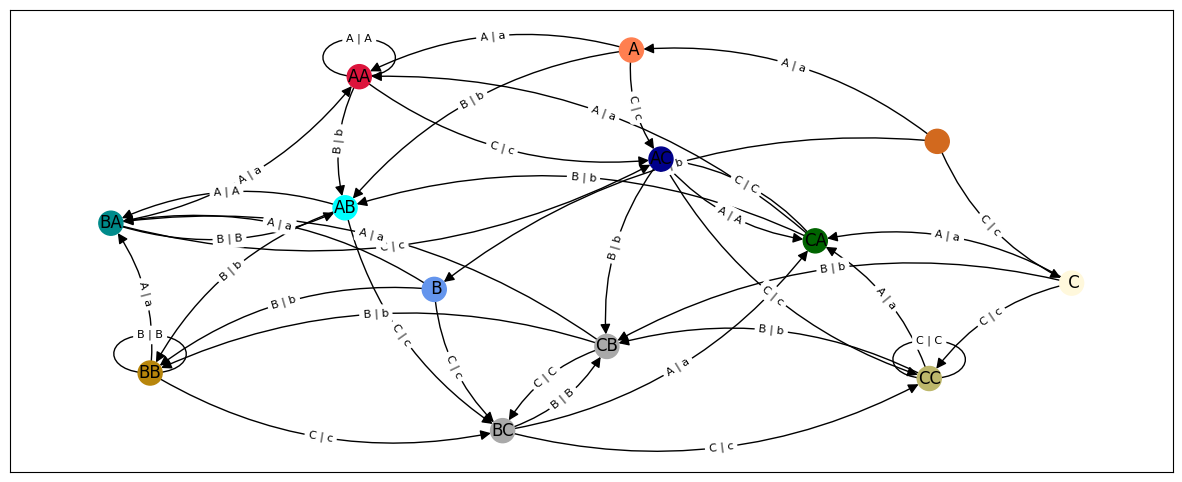

In [115]:
visualizeDiagram(cd)

### Examples with sequences

In [10]:
import random

In [11]:
for i in range(1, 6):
  length = 20
  stimuli = random.choices(["A", "B", "C"], k = length)
  stimuli = "".join(stimuli)
  print("Sequence", i, ":", stimuli)
  action = cd.seqActions(stimuli)
  print("Behavior", i, ":", action, "\n")

Sequence 1 : ACCCACAAACAACBCACCAB
Behavior 1 : accCaCAaAcAacbCaCcab 

Sequence 2 : ACBABBACCBAAACABCBAC
Behavior 2 : acbaBbaccbaaAcAbcBac 

Sequence 3 : AAABCBCACACAACBCCCBA
Behavior 3 : aaAbcBCaCACAacbCcCba 

Sequence 4 : CAAACCCCACBBBBBBCBAB
Behavior 4 : caaAccCCaCbbBBBBcBaB 

Sequence 5 : ABCBACCCAACABCBBBCCC
Behavior 5 : abcBaccCaacAbcBbBccC 



## **Question 3**

Q: Make a scatter plot of the raw activation columns. Describe any patterns you see.

### Uploading the data file

In [12]:
from google.colab import files

In [25]:
data_file = files.upload()

Saving PS2Data.txt to PS2Data.txt


In [24]:
import os

print(os.listdir("/content/"))
file_path = "/content/PS2Data (2).txt"
if os.path.exists(file_path):
    os.remove(file_path)
    print(f"파일 삭제 완료: {file_path}")
else:
    print("파일을 찾을 수 없습니다.")

['.config', 'sample_data']
파일을 찾을 수 없습니다.


In [47]:
data = []

with open("PS2Data.txt", "r", encoding="utf-8") as data_file:
    for sample in data_file:
        signal = sample.strip().split()
        signal[1:] = map(float, signal[1:])
        data.append(signal)

### Drawing a scatter plot

In [55]:
neuron1 = []
neuron2 = []

for i in range(len(data)):
  neuron1.append(data[i][1])
  neuron2.append(data[i][2])

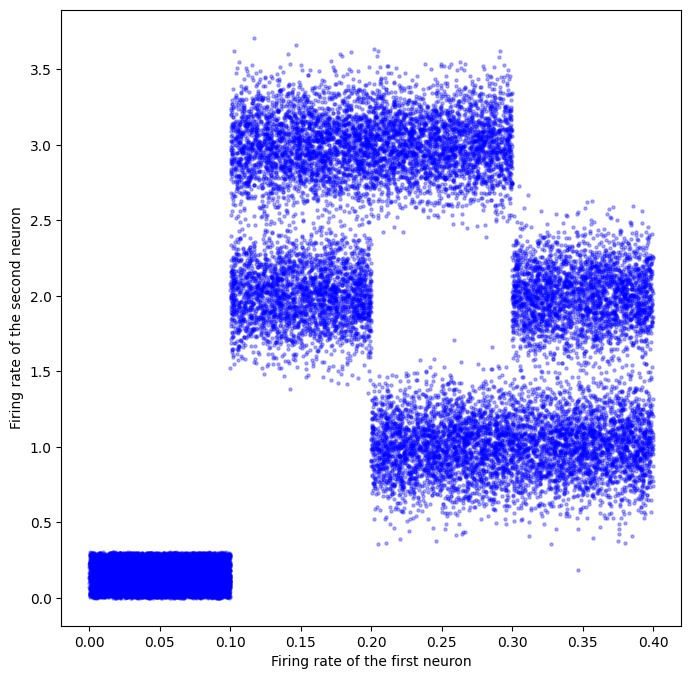

In [74]:
fig, ax = plt.subplots(nrows = 1, ncols = 1, figsize = (8, 8))

ax.scatter(neuron1, neuron2, color = "blue", alpha = 0.3, s = 5)
ax.set_xlabel("Firing rate of the first neuron")
ax.set_ylabel("Firing rate of the second neuron")

plt.show()

## **Question 4**

Q: Someone tells you that three states are required because there are three letters that can occur. Write a paragraph explaining why they are wrong.

## **Question 5**

Q: Make a plot that illustrates how the states are coded neurally. Describe the scheme that you see in words.

In [79]:
st_signal = {key: [] for key in ["AA", "AB", "AC", "BA", "BB", "BC", "CA", "CB", "CC"]}

for sample in data:
    stimulus = sample[0][-2:]
    if stimulus in st_signal:
        st_signal[stimulus].append(sample[1:])

In [84]:
print("Length of each state data:")
print("AA", len(st_signal["AA"]), "AB", len(st_signal["AB"]), "AC", len(st_signal["AC"]))
print("BA", len(st_signal["BA"]), "BB", len(st_signal["BB"]), "BC", len(st_signal["BC"]))
print("CA", len(st_signal["CA"]), "CB", len(st_signal["CB"]), "CC", len(st_signal["CC"]))

Length of each state data:
AA 2723 AB 2791 AC 2803
BA 2873 BB 2703 BC 2798
CA 2749 CB 2855 CC 2705


In [97]:
neuron1 = {key: [sample[0] for sample in st_signal[key]] for key in st_signal}
neuron2 = {key: [sample[1] for sample in st_signal[key]] for key in st_signal}

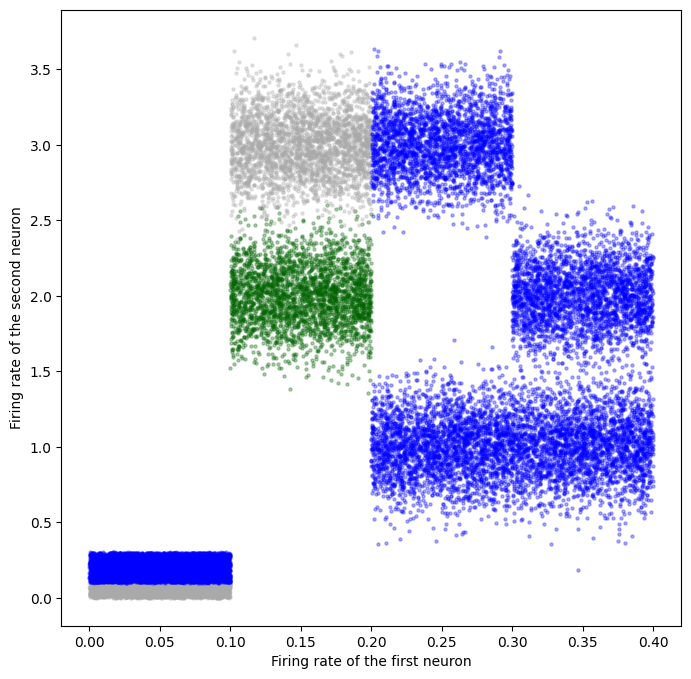

In [106]:
fig, ax = plt.subplots(nrows = 1, ncols = 1, figsize = (8, 8))

colors = list(mcolors.CSS4_COLORS.values())[24 : 24 + len(st_signal.keys())]

ax.scatter(neuron1["AA"], neuron2["AA"], color = colors[0], alpha = 0.3, s = 5)
ax.scatter(neuron1["AB"], neuron2["AB"], color = colors[1], alpha = 0.3, s = 5)
ax.scatter(neuron1["AC"], neuron2["AC"], color = colors[2], alpha = 0.3, s = 5)

ax.scatter(neuron1["BA"], neuron2["BA"], color = "blue", alpha = 0.3, s = 5)
ax.scatter(neuron1["BB"], neuron2["BB"], color = "blue", alpha = 0.3, s = 5)
ax.scatter(neuron1["BC"], neuron2["BC"], color = "blue", alpha = 0.3, s = 5)

ax.scatter(neuron1["CA"], neuron2["CA"], color = "blue", alpha = 0.3, s = 5)
ax.scatter(neuron1["CB"], neuron2["CB"], color = "blue", alpha = 0.3, s = 5)
ax.scatter(neuron1["CC"], neuron2["CC"], color = "blue", alpha = 0.3, s = 5)

ax.set_xlabel("Firing rate of the first neuron")
ax.set_ylabel("Firing rate of the second neuron")

plt.show()